<a href="https://colab.research.google.com/github/DNason1999/DS-Unit-1-Build/blob/master/MtG_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from google.colab import files
import ast
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math

#Various functions used for analyzing data

In [0]:
def make_colors(string):
  color_set = [0,0,0,0]
  if(len(string) != 0):
    for x in range(0,len(string)):
      color= matplotlib.colors.to_rgba(color_dict[string[x]])
      for y in range(0,4):
        color_set[y] = color_set[y]+color[y]
    color_set = [x/len(string) for x in color_set]
  else: return [0,0,0,0.5]
  return color_set

In [0]:
def color_names(string):
  color_name = ''
  if(len(string) != 0):
    for x in range(0,len(string)):
      color_name = color_name + ' ' + color_dict[string[x]]
  else: return 'Colorless'
  return color_name.strip()

In [0]:
def total_colors(in_dataframe, qty_column, info_column):
  t = []
  for label,content in in_dataframe.iterrows():
    temp = ''
    for qty in content[qty_column]:
      a = int(qty)
      while(a > 0):
       zed = ''.join([str(elem) for elem in content[info_column]])
       temp = temp+zed
       a -=1
    t.append(temp)
  return pd.Series(t)

In [0]:
def make_list_0(input_list):
  p = [color_combo_dict[x] for x in input_list.index]
  return p

In [0]:
def from_list(input_list, columns_in):
  nan = np.nan
  df = pd.DataFrame(data=eval(input_list), columns= columns_in)
  return df

#Data Analysis

In [0]:
#Load the data from the online repository
df = pd.read_csv('https://raw.githubusercontent.com/DNason1999/MtG-MythicChampionship-V-decklists/master/data.csv', index_col=0)
df = df.reset_index()
df.head()

,author,name,deck
0,Aaron B,Golos Fires,"[['1', 'Agent of Treachery', ['U'], ['U'], '{5..."
1,Alexander H,Bant Golos,"[['2', 'Teferi, Time Raveler', ['U', 'W'], ['U..."
2,Andrea M,Bant Food,"[['4', 'Oko, Thief of Crowns', ['G', 'U'], ['G..."
3,Andrew C,Simic Food,"[['4', 'Oko, Thief of Crowns', ['G', 'U'], ['G..."
4,Ashley M,Golgari Adventure,"[['4', 'Edgewall Innkeeper', ['G'], ['G'], '{G..."


In [0]:
#Create a rankings list based on a string ripped from the mtg official website of the standings 
rankings = '1	Javier Dominguez	,2	Jean-Emmanuel Depraz	,3	Andrea Mengucci	,4	Gabriel Nassif**	,5	Stanislav Cifka**	,6	Lee Shi Tian	,7	William Jensen	,8	Ken Yukuhiro	,9	Kenji Egashira**	,10	Mike Sigrist	,11	Carlos Romão	,12	Autumn Burchett	,13	Lucas Esper Berthoud	,14	Théo Moutier**	,15	John Rolf	,16	Seth Manfield	,17	Chris Kvartek	,18	Matthew Nass	,19	Márcio Carvalho	,20	Sebastian Pozzo	,21	Christian Hauck	,22	Mikel Díez	,23	Shahar Shenhar	,24	Martin Jůza	,25	Alexander Hayne	,26	Ondřej Stráský	,27	Ben Stark	,28	Andrew Cuneo	,29	Grzegorz Kowalski	,30	Brad Nelson	,31	Mikaela Downs	,32	Caleb Durward	,33	Eric Froehlich	,34	Patrick Fernandes	,35	David Williams	,36	Ole Andvik	,37	Piotr Głogowski	,38	Kai Budde	,39	Jacob Crook	,40	Yuuki Ichikawa	,41	Mark Donaldson	,42	Aaron Barich	,43	Ashley Muñoz	,44	Breanna Lee Tan	,45	Bertrand Fagnoni	,46	Janne Mikkonen	,47	Oliver Tiu	,48	Ethan Neubert	,49	Brian Braun-Duin	,50	Shota Yasooka	,51	Matias Leveratto	,52	Reid Duke	,53	Luis Salvatto	,54	Takeshi Senoo	,55	Jeremy Bowers	,56	Stephan Schwarz	,57	Dzianis Parkhats	,58	Raphaël Lévy	,59	Greg Orange	,60	Rei Sato	,61	João Lucas Caparroz	,62	Jessica Estephan	,63	Jan-Philipp Budde	,64	Paulo Vitor Damo da Rosa	,65	Gaby Spartz	,66	Miguel da Cruz Simões	,67	Grace Naces	,68	Gustavo Coraiola'
rankings0 = rankings.split(sep=',')
rankings1  = []
for x in rankings0:
  y = (x.split(sep= '\t', maxsplit=1))
  z=[]
  z.append(int(y[0]))
  t = y[1].replace('\t','').replace("**",'')
  t = t.split()
  z.append(t[0]+" "+t[1][0])
  rankings1.append(z)

In [0]:
#The loaded data in the csv had the decklists as lists of lists.
#Therefore apply a custom function to create a dataframe out of each list of lists
columns0 = ['qty','name','color_identity','colors','mana_cost','cmc','power','toughness','rarity','type_line']

main = df.copy()
main['deck'] = main['deck'].apply(lambda x : from_list(x,columns0))

In [0]:
#Because some players names contain unique, non-ascii characters,
#the names from the rankings list will be used in the main list of decks
names = [x[1] for x in rankings1]
main['author'] = sorted(names)
main.head()

,author,name,deck
0,Aaron B,Golos Fires,qty ... ...
1,Alexander H,Bant Golos,qty ... typ...
2,Andrea M,Bant Food,qty name ... ra...
3,Andrew C,Simic Food,qty ... ...
4,Ashley M,Golgari Adventure,qty ... ...


In [0]:
#Create a dictionary where the players name is the key and their rank is the value
ranks = {}

for x in rankings1:
  ranks[x[1]] = x[0]

In [0]:
#Create a new list that corresponds to the players rank
main['rank'] = [ranks[x] for x in main['author']]

In [0]:
#Sort the dataframe based on the players rank in the tournament
#Then drop the old, irrelevant indexes
main = main.sort_values(by='rank')
main = main.reset_index().drop('index',axis=1)

In [0]:
#Turn the list style color_identities to strings
def analyze_0(input_dataframe, column_name):
  temp = pd.Series([(''.join([str(elem) for elem in x])) for x in input_dataframe[column_name]]).value_counts()
  return temp

#Used to sum the total quantity of colors in a decklist
def analyze_1(input_list):
  temp_list = []
  for x in input_list:
    for y in range(0,len(x)):
      temp_list.append(x[y])
  series = pd.Series(temp_list)
  return series.value_counts()

In [0]:
a = main['deck'][0]['color_identity']
b = [(' '.join([str(elem) for elem in x])).strip() for x in a]
c = pd.Series(b)
d = c.value_counts()

In [0]:
analysis_df = main[['author','name']]

In [0]:
analysis_df['total_cards'] = [sum(x['qty'].astype(int)) for x in main['deck']]
analysis_df['deck_colors'] = [analyze_0(x, 'color_identity') for x in main['deck']]
analysis_df['color_identity_*_qty'] =  [total_colors(x, 'qty', 'color_identity') for x in main['deck']]
analysis_df['deck_colors_total'] = [analyze_1(x) for x in analysis_df['color_identity_*_qty']]


In [0]:
analysis_df.head()

,author,name,total_cards,deck_colors,color_identity_*_qty,deck_colors_total
0,Javier D,Gruul Aggro,75,G 10 GR 5 R 5 W 1 dtype: int64,0 GGGG 1 GRGRGRGR 2 GRGRGRG...,G 44 R 38 W 2 dtype: int64
1,Jean-Emmanuel D,Bant Golos,75,GU 7 U 7 G 6 W 5 UW...,0 UWUWUW 1 BGRUWBGRUWBGR...,U 39 G 38 W 26 B 6 R 5 dtype:...
2,Andrea M,Bant Food,75,G 10 U 4 GU 3 GW 3 W 2 U...,0 GUGUGUGU 1 GGGG 2 GGGG 3...,G 51 U 30 W 17 dtype: int64
3,Gabriel N,Simic Food,75,G 11 GU 4 U 4 BU 1 dtype: int64,0 GUGUGUGU 1 GGGG 2 GGGG 3...,G 50 U 31 B 1 dtype: int64
4,Stanislav C,Bant Ramp,75,G 9 GU 5 U 5 UW 3 GW 2 BU ...,0 UWUW 1 GUGUGUGU 2 GGGG 3...,G 54 U 35 W 15 B 2 dtype: int64


In [0]:
analysis_df['deck_colors'][0]

G     10
GR     5
R      5
W      1
dtype: int64

In [0]:
color_combos = []
for x in analysis_df['deck_colors']:
  for y in x.index:
    if y in color_combos:
      pass
    else:
      color_combos.append(y)

In [0]:
color_combos.sort()
color_combo_dict = {}
for k, v in zip(color_combos,range(0,len(color_combos))):
  color_combo_dict[k] = v

In [0]:
color_dict = {'W':'white','U':'blue','B':'black','R':'red','G':'green'}

In [0]:
color_combo_dict.keys()

dict_keys(['', 'B', 'BG', 'BGRUW', 'BR', 'BRU', 'BRW', 'BU', 'BW', 'G', 'GR', 'GU', 'GW', 'R', 'RU', 'RW', 'U', 'UW', 'W'])

In [0]:
color_quantity_template = {}
for x in color_combo_dict.keys():
  color_quantity_template[x] = 0

In [0]:
color_quantity_template

#real Stuff

In [0]:
colors_dict = {}
for k in color_combos:
  colors_dict[k] = make_colors(k)

In [0]:
color_names_dict = {}
for k in color_combos:
  color_names_dict[k] = color_names(k)

In [0]:
def reconfigure_list(input_list):
  a = color_quantity_template
  for b in input_list.index:
    a[b] = input_list[b]
  return list(a.values())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


190


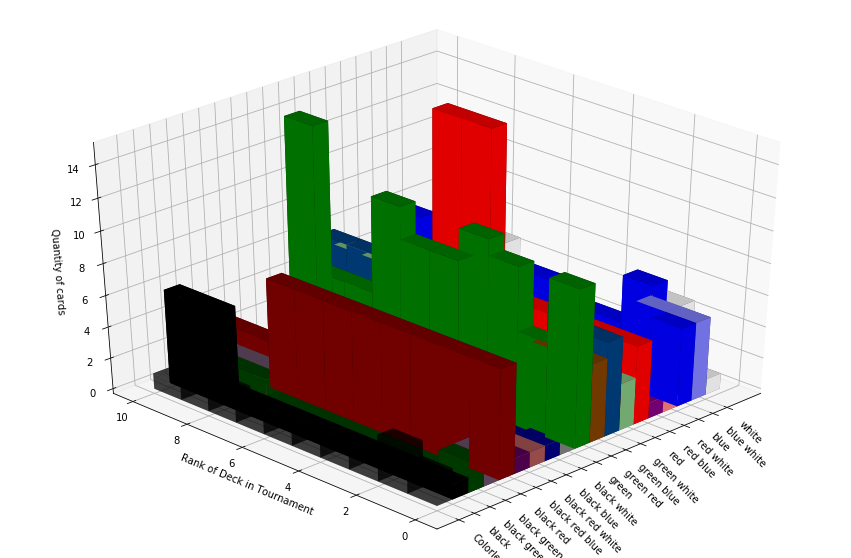

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
quantity_to_show = 10
temp_df = analysis_df[['deck_colors']]

temp_list = []
for x in temp_df['deck_colors']:
  temp_list.append(reconfigure_list(x))

temp_df['reconfigured_lists'] = temp_list

quants= []
for alpher in temp_df['reconfigured_lists'][:quantity_to_show]:
  for beter in alpher:
    quants.append(beter)

colors=[]
counter0 = quantity_to_show
while(counter0 > 0):
  a = list(colors_dict.values())
  for caj in a:
    colors.append(caj)
  counter0 -= 1

print(len(colors))

# temp = [x for data in temp_df['deck_colors']]
_x = list(color_combo_dict.values())
_y = list(range(0,quantity_to_show))

_xx, _yy = np.meshgrid(_x, _y,)# _z)
x, y= _xx.ravel(), _yy.ravel()#, _zz.ravel()

bottom = 0
width = depth = 1

# dz = 
ax.bar3d(x= x, y= y, z=bottom, dx=width,dy=depth,dz=quants,shade=True, color=colors)

# for z, data in zip(range(0,quantity_to_show), analysis_df['deck_colors'][:quantity_to_show]):
#   x_s = [color_combo_dict[x] for x in data.index]
#   colors = [colors_dict[x] for x in data.index]
#   for x, quantity,c in zip(x_s, data, colors):
#     width = depth = 1
#     

ax.set_xticklabels([color_names_dict[x] for x in color_combos], rotation=-45, ha='left')
ax.set_xticks(range(0,len(color_combos)))
#ax.set_yticks(range(0,quantity_to_show))
#ax.set_yticklabels(range(1,quantity_to_show+1))
ax.set_ylabel('Rank of Deck in Tournament')
ax.set_zlabel('Quantity of cards')
#ax.set_xlabel('X Axis')

#ax.bar3d(0,0,0,1,1,30)

#ax.view_init(35,45)
ax.view_init(35, 225)

#ax.set_title('Quantity of Cards per Deck of each Color')

fig.set_size_inches(15,10)
fig.set_alpha(0)
# fig.show()
fig.savefig('3dbarplot')

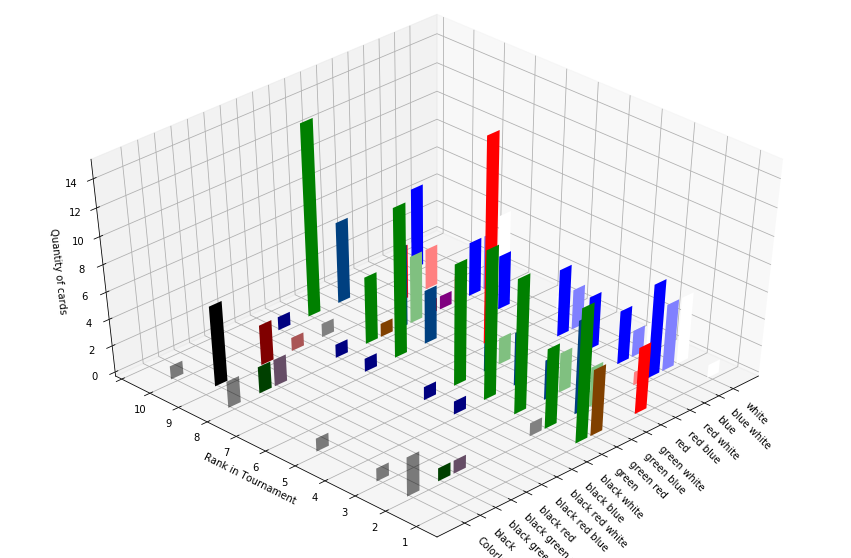

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_animated(True)
quantity_to_show = 10
ina = analysis_df['deck_colors'][:quantity_to_show].tolist()
ina.reverse()


for z, data in zip(range(quantity_to_show,0, -1), ina):
  quantity_of_cards = [color_combo_dict[x] for x in data.index]
  colors = [colors_dict[x] for x in data.index]
  for x,y,c in zip(quantity_of_cards, data, colors):
    width = 1
    ax.bar(left= [x], height= y, zs=z, zdir='y', color= c,zorder= math.pow(math.hypot(z+width,y+width),10))

ax.set_xticklabels([color_names_dict[x] for x in color_combos], rotation=-45, ha='left')
ax.set_xticks(range(0,len(color_combos)))
ax.set_yticks(range(1,quantity_to_show+2))
ax.set_yticklabels(range(1,quantity_to_show+1))
ax.set_ylabel('Rank in Tournament')
ax.set_zlabel('Quantity of cards')
#ax.set_xlabel('X Axis')
#ax.bar(left= [0], height= 20, zs=0, zdir='y', color= 'black')


ax.view_init(45, 225)

fig.set_size_inches(15,10)
plt.show();

In [0]:
analysis_df['majority_color'] = [x.index[0] for x in analysis_df['deck_colors']]

In [0]:
majority_colors = analysis_df['majority_color'].value_counts()

Text(0.0, 1.0, 'Color Majority of Decks')

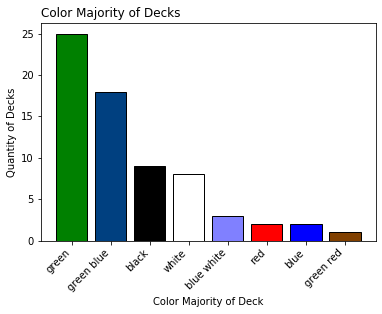

In [0]:
fig, ax = plt.subplots()
#ax.set_facecolor('#E0E0E0')
#fig.set_facecolor('#E0E0E0')

colors= [colors_dict[x] for x in majority_colors.index]
ax.bar(x=majority_colors.index, height= majority_colors, color = colors, edgecolor= 'black')

ax.set_xticklabels([color_names_dict[x] for x in majority_colors.index], rotation= 45, ha='right')
ax.set_xlabel('Color Majority of Deck')

ax.set_ylabel('Quantity of Decks')

ax.set_title('Color Majority of Decks', loc='left')